# Лабораторная работа №3. Машинное обучение

## 1. Анализ и предобработка

### Предварительный анализ данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from IPython.display import display

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

import xgboost as xgb

In [ ]:
data = pd.read_csv('./credit_scoring.csv')

In [113]:
data

,client_id,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
0,0,0.496289,49.1,13,0,0.0,2,0,5298.360639,0.387028,0
1,1,0.433567,48.0,9,2,2.0,1,0,6008.056256,0.234679,0
2,2,2206.731199,55.5,21,1,NaN,1,0,NaN,0.348227,0
3,3,886.132793,55.3,3,0,0.0,0,0,NaN,0.971930,0
4,4,0.000000,52.3,1,0,0.0,0,0,2504.613105,1.004350,0
...,...,...,...,...,...,...,...,...,...,...,...
74995,74995,0.169463,67.6,5,1,0.0,0,0,20129.654428,0.074689,0
74996,74996,2085.662215,43.2,1,1,0.0,0,0,NaN,1.005390,0
74997,74997,0.118935,23.0,4,0,0.0,2,0,2019.117329,0.384511,0
74998,74998,0.203414,46.3,14,2,0.0,0,0,16823.909642,0.524093,0


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              75000 non-null  int64  
 1   DIR                    75000 non-null  float64
 2   Age                    75000 non-null  float64
 3   NumLoans               75000 non-null  int64  
 4   NumRealEstateLoans     75000 non-null  int64  
 5   NumDependents          73084 non-null  float64
 6   Num30-59Delinquencies  75000 non-null  int64  
 7   Num60-89Delinquencies  75000 non-null  int64  
 8   Income                 60153 non-null  float64
 9   BalanceToCreditLimit   75000 non-null  float64
 10  Delinquent90           75000 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 6.3 MB


In [115]:
data.describe()

,client_id,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
count,75000.000000,75000.000000,75000.000000,75000.00000,75000.000000,73084.000000,75000.000000,75000.000000,6.015300e+04,75000.000000,75000.000000
mean,37499.500000,353.260293,52.595605,8.44976,1.016693,0.755966,0.428320,0.248000,6.740059e+03,6.276196,0.066840
std,21650.779432,2117.237432,14.869729,5.15644,1.124019,1.108119,4.276439,4.239486,1.422875e+04,267.743321,0.249746
min,0.000000,0.000000,21.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,18749.750000,0.176022,41.300000,5.00000,0.000000,0.000000,0.000000,0.000000,3.421354e+03,0.029703,0.000000
50%,37499.500000,0.366848,52.200000,8.00000,1.000000,0.000000,0.000000,0.000000,5.424552e+03,0.153720,0.000000
75%,56249.250000,0.862650,63.100000,11.00000,2.000000,1.000000,0.000000,0.000000,8.291518e+03,0.560638,0.000000
max,74999.000000,332600.272820,109.800000,56.00000,32.000000,20.000000,98.000000,98.000000,1.805573e+06,50873.874533,1.000000


In [116]:
data['Delinquent90'].value_counts()

,count
Delinquent90,
0,69987
1,5013


In [117]:
data = data[['DIR', 'Age', 'NumLoans', 'NumRealEstateLoans', 'NumDependents', 'Num30-59Delinquencies', 'Num60-89Delinquencies',
             'Income', 'BalanceToCreditLimit', 'Delinquent90']]

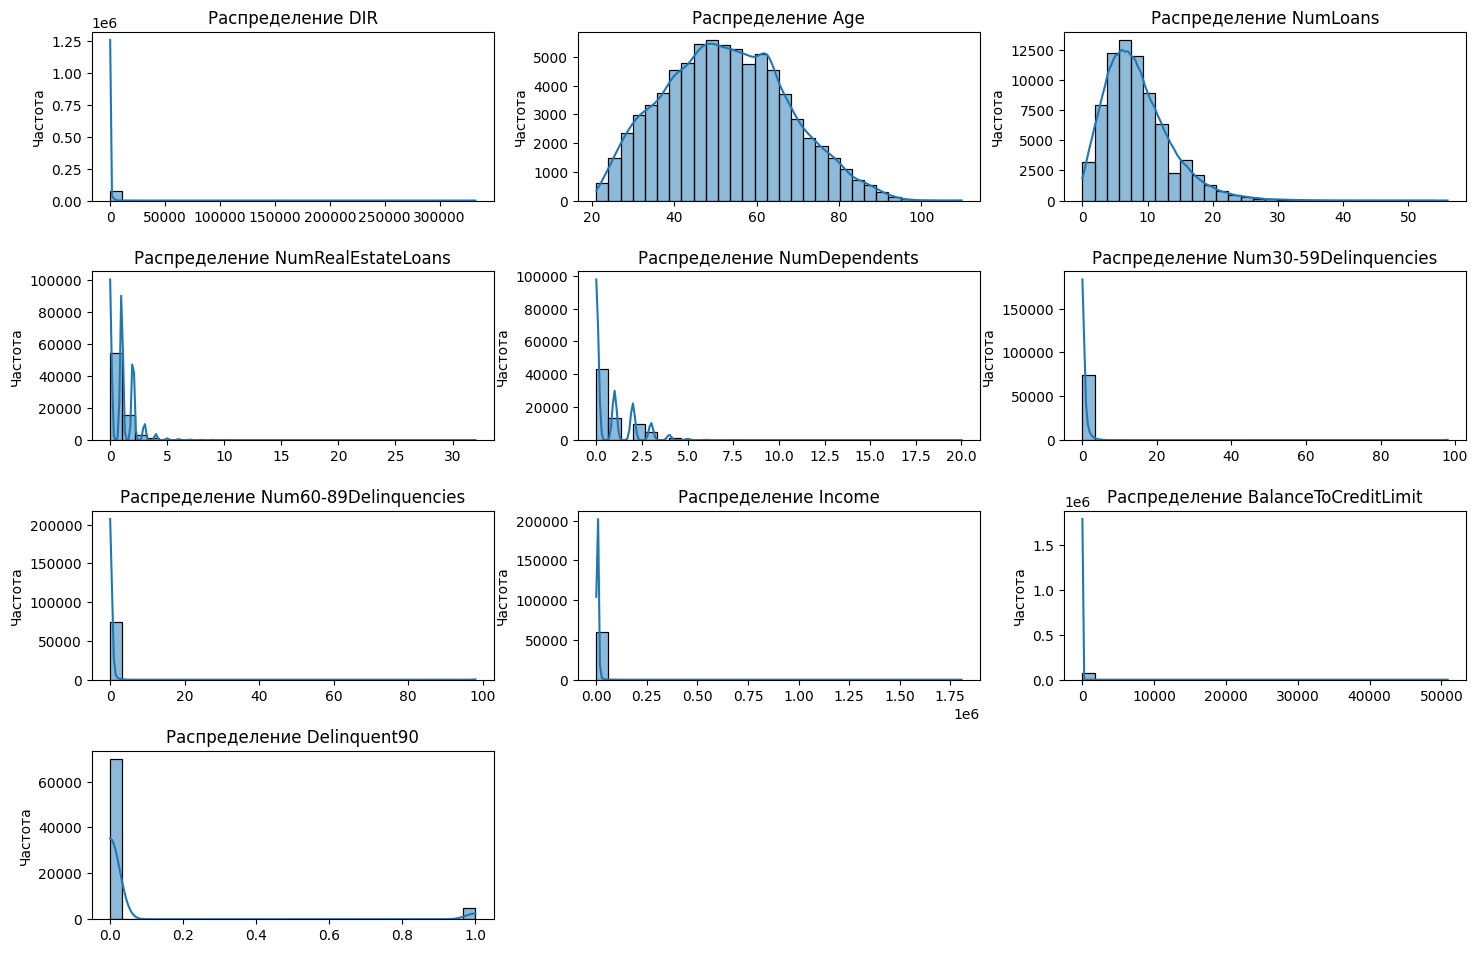

In [118]:
num_columns = 3
num_rows = (len(data.columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))
fig.tight_layout(pad=3.0)

for i, column in enumerate(data.columns):
    row, col = divmod(i, num_columns)
    sns.histplot(data[column], bins=30, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Распределение {column}")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Частота")

for i in range(len(data.columns), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.show()

По итогам предварительного анализа данных можно сделать следующие выводы:
1. 11 признаков, client_id используется только для уникальной идентификации записей. 10 признаков мы будем использовать для обучения модели, они все имеют вещественный либо целочиселнный тип данных. Признак Delinquent90 будем предсказывать, он имеет только два типа значений - 0 и 1. Соответственно, в данной работе решается задача бинарной классификации.
2. Классы несбалансированные, в наличии примерно в 12 раз больше записей без просрочек выплат по кредиту более 90 дней, чем с ними.
3. В столбцах NumDependents и Income имеются пропуски, которые нужно будет обработать.
4. Скорее всего необходимо будет что-то делать в выбросами, потому что они видны на графиках довольно четко. Кроме того, в таблице с описательными статистиками также можно отследить, например, насколько сильно максимальные значения некоторых признаков далеки от третьего квартиля.
5. Обязательно стоит выполнить скалирование данных перед обучением модели, так как разница диапазонов значений разных признаков довольно большая, что может негативно отразиться на работе моделей

### Предобработка данных

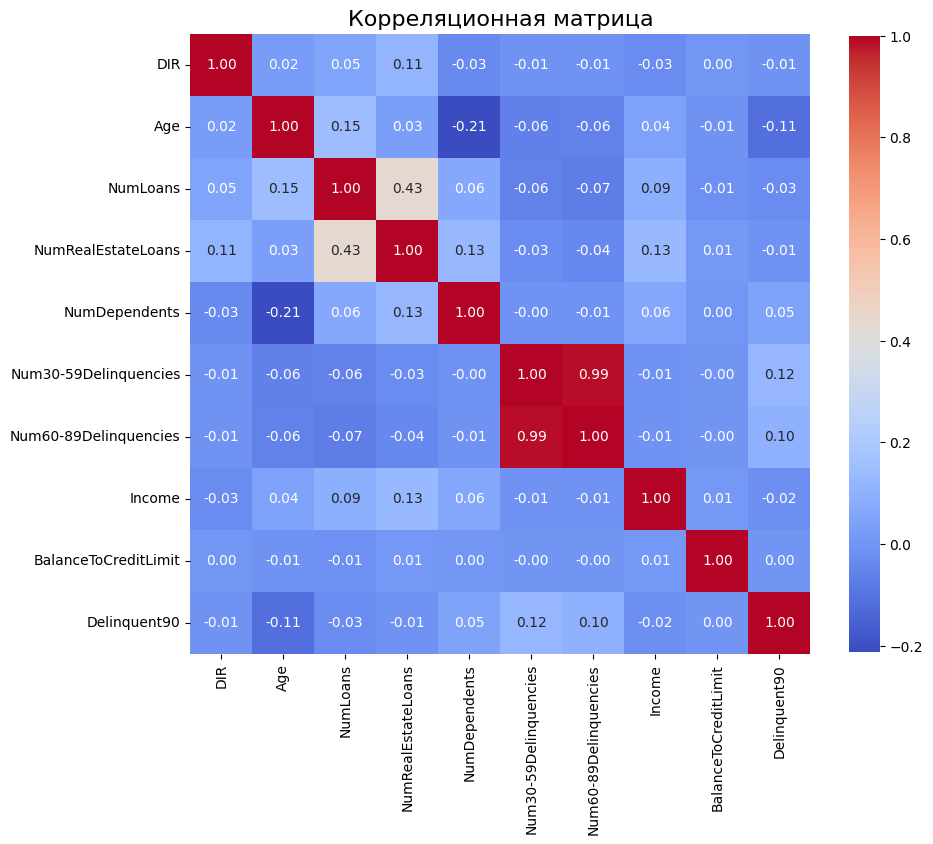

In [119]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица', fontsize=16)
plt.show()

Четко прослеживается корреляция между признаками Num30-59Delinquencies и Num60-89Delinquencies. Это довольно логично и может объясняться тем, что у людей, которые имеют просрочки выплат по кредиту от 30 до 59 дней, будут и просрочки от 60 до 89 дней, чаще, чем у тех, у кого просрочек нет.

Поэтому удалим столбец Num60-89Delinquencies, так как он несет меньше информации, чем Num30-59Delinquencies.

In [120]:
data = data[['DIR', 'Age', 'NumLoans', 'NumRealEstateLoans', 'NumDependents', 'Num30-59Delinquencies',
             'Income', 'BalanceToCreditLimit', 'Delinquent90']]

Посмотрим подробнее на пропуски в данных

In [121]:
nan_count = data.isnull().sum()
total = len(data)
nan_percentage = (nan_count / total) * 100
nan_info = pd.DataFrame({
    'Количество пропусков': nan_count,
    'Процент пропусков': nan_percentage
})
print(nan_info)

                       Количество пропусков  Процент пропусков
DIR                                       0           0.000000
Age                                       0           0.000000
NumLoans                                  0           0.000000
NumRealEstateLoans                        0           0.000000
NumDependents                          1916           2.554667
Num30-59Delinquencies                     0           0.000000
Income                                14847          19.796000
BalanceToCreditLimit                      0           0.000000
Delinquent90                              0           0.000000


Признак NumDependents, скорее всего, имеет пропущенные значения там, где у человека нет членов семьи на иждивении. Поэтому пропуски в этом столбце заменим на 0.

Пропущенные значения в столбце Income заменим средним значением.

In [122]:
data['NumDependents'] = data['NumDependents'].fillna(0)

<ipython-input-122-7498ef55430b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NumDependents'] = data['NumDependents'].fillna(0)


In [123]:
median_income = data['Income'].median()
data['Income'] = data['Income'].fillna(median_income)

<ipython-input-123-fcbe97b64bcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Income'] = data['Income'].fillna(median_income)


Далее посмотрим подробнее на выбросы

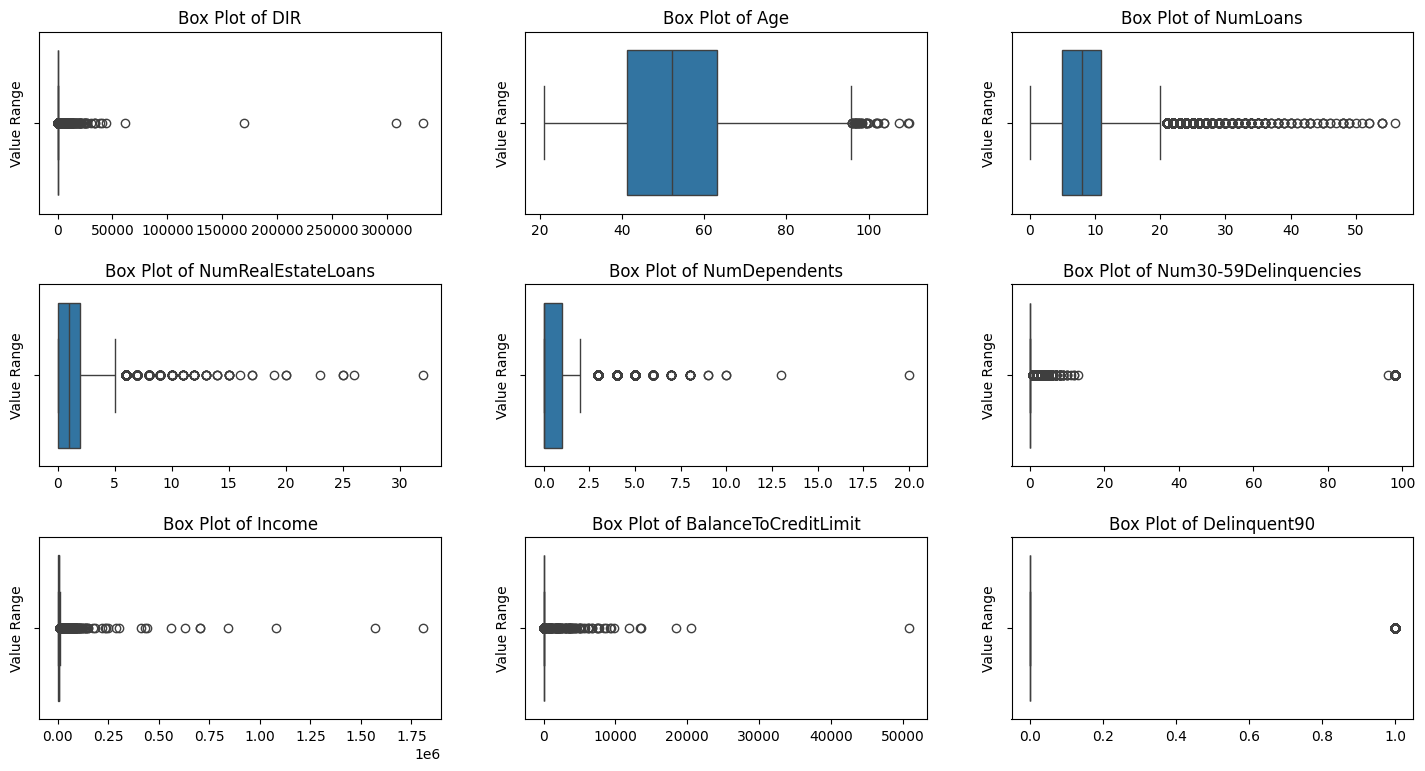

In [124]:
num_columns = 3
num_rows = (len(data.columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 8))
fig.tight_layout(pad=3.0)

for i, column in enumerate(data.columns):
    row, col = divmod(i, num_columns)
    sns.boxplot(data=data, x=column, ax=axes[row, col])
    axes[row, col].set_title(f"Box Plot of {column}")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Value Range")

for i in range(len(data.columns), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.show()

Удалим выбросы в тех столбцах, где где их много и они ярко выражены. Дополнительным критерием послужили описательные статистики, а именно большая разница между максимальными значениями и третьими квартилями признаков.

In [125]:
columns = ['DIR', 'BalanceToCreditLimit']

for column in columns:
   Q1 = data[column].quantile(0.25)
   Q3 = data[column].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR
   outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
   data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]
outliers

,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Income,BalanceToCreditLimit,Delinquent90
1025,0.315325,57.0,4,0,0.0,1,4027.861418,3076.433475,0
1094,0.021846,46.2,3,0,2.0,3,3378.241965,1.466111,1
1405,0.363546,40.2,7,2,4.0,0,7329.042715,3.075826,1
1433,0.151573,47.4,4,1,0.0,0,7229.062756,3490.889988,0
1564,0.746574,71.1,5,2,0.0,0,2333.830488,7429.526546,0
...,...,...,...,...,...,...,...,...,...
73306,0.310729,50.4,4,0,2.0,0,1606.032279,3.326190,1
73369,0.304373,44.2,3,0,2.0,0,5059.170853,2.262842,0
73564,0.037301,68.1,2,0,0.0,1,4036.148084,2.151319,1
74620,0.127741,51.3,5,0,2.0,3,3784.803012,1.646768,0


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59127 entries, 0 to 74999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DIR                    59127 non-null  float64
 1   Age                    59127 non-null  float64
 2   NumLoans               59127 non-null  int64  
 3   NumRealEstateLoans     59127 non-null  int64  
 4   NumDependents          59127 non-null  float64
 5   Num30-59Delinquencies  59127 non-null  int64  
 6   Income                 59127 non-null  float64
 7   BalanceToCreditLimit   59127 non-null  float64
 8   Delinquent90           59127 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 4.5 MB


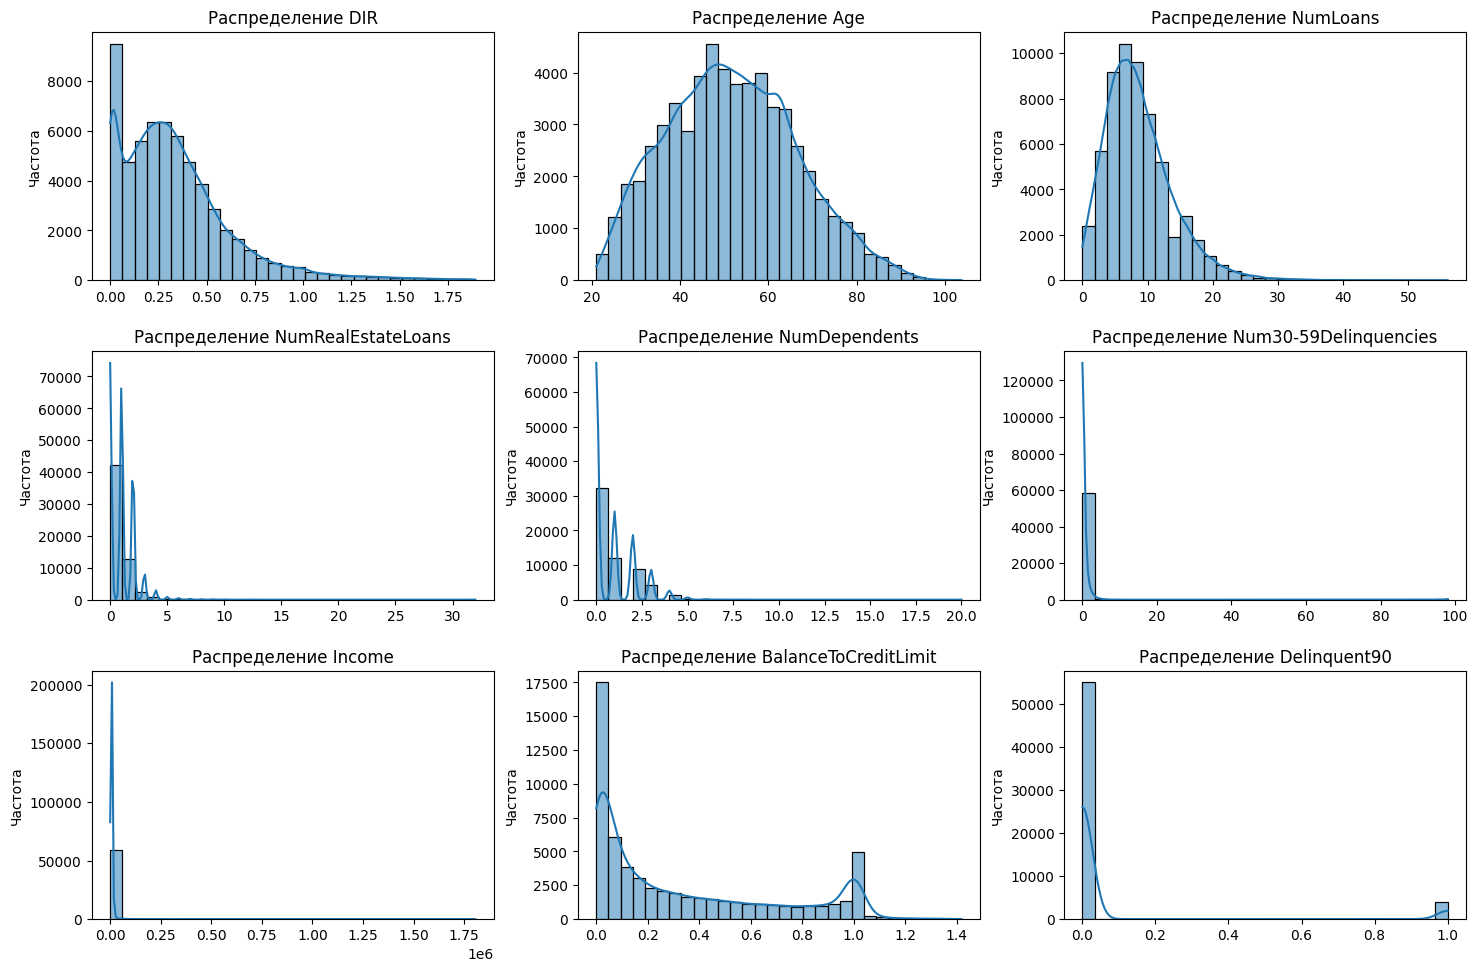

In [127]:
num_columns = 3
num_rows = (len(data.columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))
fig.tight_layout(pad=3.0)

for i, column in enumerate(data.columns):
    row, col = divmod(i, num_columns)
    sns.histplot(data[column], bins=30, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Распределение {column}")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Частота")

for i in range(len(data.columns), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.show()

In [75]:
data.describe()

,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Income,BalanceToCreditLimit,Delinquent90
count,59127.000000,59127.000000,59127.000000,59127.000000,59127.000000,59127.000000,5.912700e+04,59127.000000,59127.000000
mean,0.335280,51.765843,8.673567,1.033893,0.835676,0.463663,6.889500e+03,0.330925,0.068598
std,0.284971,14.660676,5.210027,1.130719,1.133746,4.545570,1.430637e+04,0.352807,0.252772
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.132679,41.000000,5.000000,0.000000,0.000000,0.000000,3.601444e+03,0.033250,0.000000
50%,0.286014,51.200000,8.000000,1.000000,0.000000,0.000000,5.458525e+03,0.173430,0.000000
75%,0.460458,62.100000,11.000000,2.000000,1.000000,0.000000,8.340771e+03,0.579641,0.000000
max,1.892300,103.800000,56.000000,32.000000,20.000000,98.000000,1.805573e+06,1.418454,1.000000


### Скалирование данных

In [76]:
numerical_features = ['DIR', 'Age', 'NumLoans', 'NumRealEstateLoans', 'NumDependents', 'Num30-59Delinquencies',
                      'Income', 'BalanceToCreditLimit']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

## 2. Дерево решений

In [77]:
X = data.drop('Delinquent90', axis=1)
y = data['Delinquent90']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,
                           class_names=np.unique(y).astype(str),
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
display(graph)

Output hidden; open in https://colab.research.google.com to view.

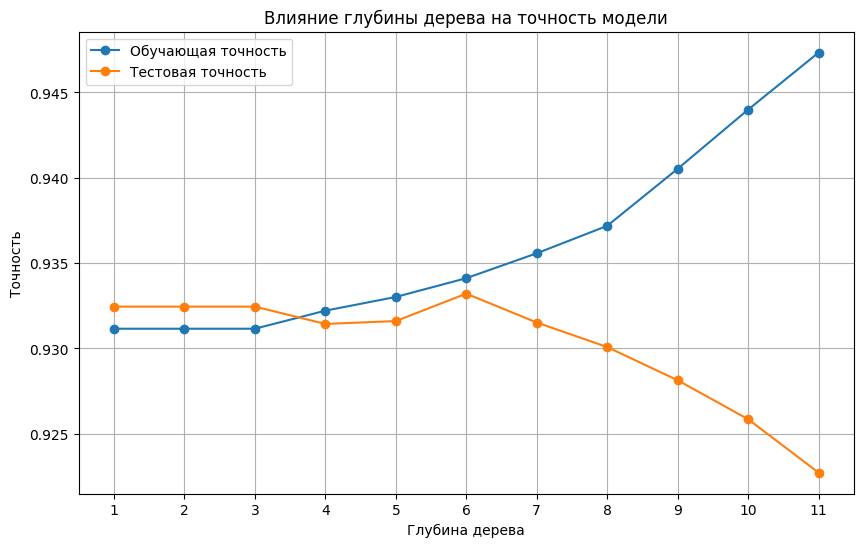

In [78]:
X = data.drop('Delinquent90', axis=1)
y = data['Delinquent90']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

depths = range(1, 12)
train_accuracies = []
test_accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Обучающая точность', marker='o')
plt.plot(depths, test_accuracies, label='Тестовая точность', marker='o')
plt.title('Влияние глубины дерева на точность модели')
plt.xlabel('Глубина дерева')
plt.ylabel('Точность')
plt.xticks(depths)
plt.legend()
plt.grid()
plt.show()

Максимальная тестовая точность достигается при глубине дерева, равной 6. Далее чем больше глубина дерева, тем меньше тестовая точность (при том, что обучающая точность продолжает возрастать), таким образом проявляется переобучение модели. Значит, оптимальная глубина дерева - 6.

In [79]:
X = data.drop('Delinquent90', axis=1)
y = data['Delinquent90']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': range(1, 12),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Лучшие параметры:", best_params)
print("Лучший кросс-валидационный балл:", best_score)

best_model = grid_search.best_estimator_
test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

print("Тестовая точность:", test_accuracy)

Fitting 5 folds for each of 132 candidates, totalling 660 fits
Лучшие параметры: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучший кросс-валидационный балл: 0.9318407446794484
Тестовая точность: 0.9314222898697785


## 3. Ансамблевые методы

In [80]:
X = data.drop('Delinquent90', axis=1)
y = data['Delinquent90']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_model = LogisticRegression(solver='liblinear', random_state=42)

param_grid_model = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search_model = GridSearchCV(estimator=base_model, param_grid=param_grid_model,
                                  scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

grid_search_model.fit(X_train, y_train)

best_model_params = grid_search_model.best_params_
best_model_score = grid_search_model.best_score_

print("Лучшие параметры для базовой модели:", best_model_params)
print("Лучший кросс-валидационный балл для базовой модели:", best_model_score)

bagging_model = BaggingClassifier(estimator=grid_search_model.best_estimator_,
                                   n_estimators=50, random_state=42)

param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0]
}

grid_search_bagging = GridSearchCV(estimator=bagging_model, param_grid=param_grid_bagging,
                                    scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

grid_search_bagging.fit(X_train, y_train)

best_bagging_params = grid_search_bagging.best_params_
best_bagging_score = grid_search_bagging.best_score_

print("Лучшие параметры для бэггинга:", best_bagging_params)
print("Лучший кросс-валидационный балл для бэггинга:", best_bagging_score)

best_bagging_model = grid_search_bagging.best_estimator_
test_pred = best_bagging_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

print("Тестовая точность бэггинга:", test_accuracy)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Лучшие параметры для базовой модели: {'C': 0.1, 'penalty': 'l1'}
Лучший кросс-валидационный балл для базовой модели: 0.9312910796810675
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Лучшие параметры для бэггинга: {'max_features': 1.0, 'max_samples': 0.8, 'n_estimators': 10}
Лучший кросс-валидационный балл для бэггинга: 0.9312910796810675
Тестовая точность бэггинга: 0.9318450870962286


In [81]:
X = data.drop('Delinquent90', axis=1)
y = data['Delinquent90']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_models = [
    ('logreg', Pipeline([
        ('clf', LogisticRegression(solver='liblinear', random_state=42))
    ])),
    ('knn', KNeighborsClassifier())
]

meta_model = LogisticRegression(solver='liblinear', random_state=42)

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

param_grid_logreg = {
    'logreg__clf__C': [0.1, 1, 10, 100],
    'logreg__clf__penalty': ['l1', 'l2']
}

param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9]
}

param_grid_stacking = {**param_grid_logreg, **param_grid_knn,
                       'final_estimator__C': [0.1, 1, 10, 100]}

grid_search_stacking = GridSearchCV(estimator=stacking_model, param_grid=param_grid_stacking,
                                     scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

grid_search_stacking.fit(X_train, y_train)

best_stacking_params = grid_search_stacking.best_params_
best_stacking_score = grid_search_stacking.best_score_

print("Лучшие параметры для стекинга:", best_stacking_params)
print("Лучший кросс-валидационный балл для стекинга:", best_stacking_score)

best_stacking_model = grid_search_stacking.best_estimator_
test_pred = best_stacking_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

print("Тестовая точность стекинга:", test_accuracy)

Fitting 3 folds for each of 128 candidates, totalling 384 fits
Лучшие параметры для стекинга: {'final_estimator__C': 1, 'knn__n_neighbors': 5, 'logreg__clf__C': 0.1, 'logreg__clf__penalty': 'l1'}
Лучший кросс-валидационный балл для стекинга: 0.9315870700408025
Тестовая точность стекинга: 0.9327752409944191


In [84]:
X = data.drop('Delinquent90', axis=1)
y = data['Delinquent90']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                               scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

grid_search_rf.fit(X_train, y_train)

best_rf_params = grid_search_rf.best_params_
best_rf_score = grid_search_rf.best_score_

print("Лучшие параметры для случайного леса:", best_rf_params)
print("Лучший кросс-валидационный балл для случайного леса:", best_rf_score)

best_rf_model = grid_search_rf.best_estimator_
test_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

print("Тестовая точность случайного леса:", test_accuracy)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Лучшие параметры для случайного леса: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Лучший кросс-валидационный балл для случайного леса: 0.9326864039375623
Тестовая точность случайного леса: 0.9337899543378996


Accuracy: 0.93
F_score: 0.19
Важность признаков:
                 Feature  Importance
5  Num30-59Delinquencies    0.401442
7   BalanceToCreditLimit    0.203353
3     NumRealEstateLoans    0.068071
2               NumLoans    0.066529
1                    Age    0.066458
4          NumDependents    0.066251
0                    DIR    0.064519
6                 Income    0.063379


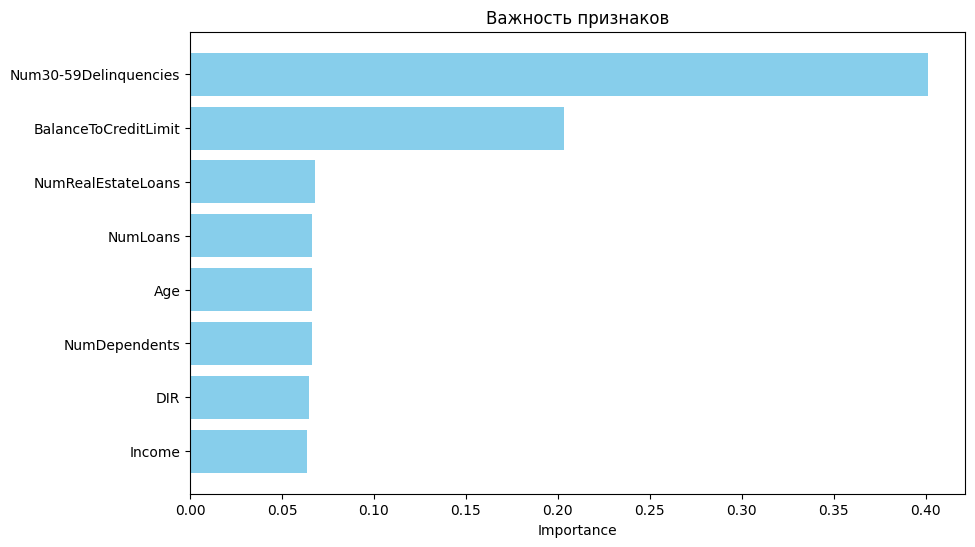

In [88]:
X = data.drop('Delinquent90', axis=1)
y = data['Delinquent90']

X = X.select_dtypes(include=[np.number])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

beta = 1
f_score = fbeta_score(y_test, y_pred, beta=beta)
print(f'F_score: {f_score:.2f}')


importance = xgb_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Важность признаков:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Важность признаков')
plt.gca().invert_yaxis()
plt.show()